## Chrome history with pandas

from this [post](https://applecrazy.github.io/blog/posts/analyzing-browser-hist-using-python/)

Windows:
````
sqlite History "select datetime(last_visit_time/1000000-11644473600,'unixepoch'),url from  urls order by last_visit_time desc" > %userprofile%\hist.txt
````

Linux:

````
sqlite3 History "select datetime(last_visit_time/1000000-11644473600,'unixepoch'),url from  urls order by last_visit_time desc" > ~/hist.txt
````

header set?
['2017-11-13 07:44:16', 'https://login.salesforce.com/']


<IPython.core.display.Javascript object>


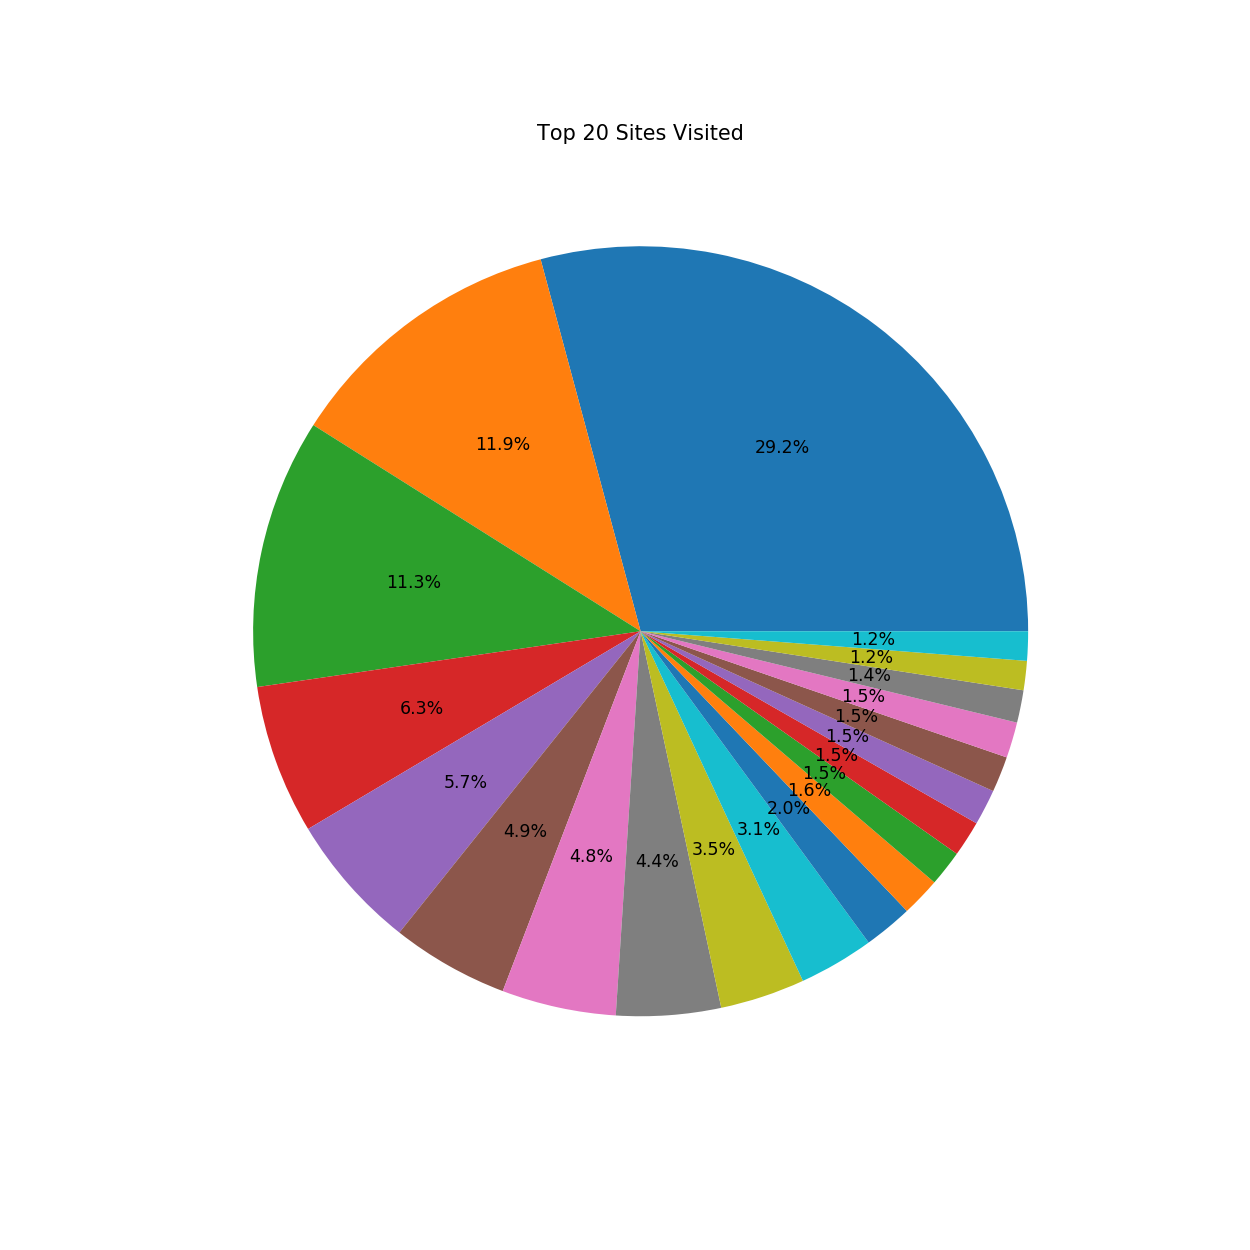

,domain,count
0,eu3.salesforce.com,214
1,hypertrak,87
2,kuoni.service-now.com,83
3,hotels.gta-travel.com,46
4,adfs.kuonisso.com,42
5,c.eu3.content.force.com,36
6,login.salesforce.com,35
7,dub01.online.tableau.com,32
8,www.google.com.hk,26
9,developer.gta-travel.com,23


In [11]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from urllib.parse import urlparse
import matplotlib.pyplot as plt

# Open our file
with open('hist.txt') as f:
    content = f.readlines()
# Strip whitespace then split on first occurrence of pipe character
raw_data = [line.split('|', 1) for line in [x.strip() for x in content]]
# We now have a 2D list.
print('header set?')
print(raw_data[1])

data = pd.DataFrame(raw_data, columns=['datetime', 'url'])
# data.head(1)

data.datetime = pd.to_datetime(data.datetime)
# print('datetime parse?')
# data.datetime[0]

parser = lambda u: urlparse(u).netloc
data.url = data.url.apply(parser)

# data.head(1)
# Aggregate domain entries
site_frequencies = data.url.value_counts().to_frame()
# Make the domain a column
site_frequencies.reset_index(level=0, inplace=True)
# Rename columns to appropriate names
site_frequencies.columns = ['domain', 'count']
# Display top 2
# site_frequencies.head(2)

topN = 20
plt.figure(1, figsize=(10,10))
plt.title('Top $n Sites Visited'.replace('$n', str(topN)))
pie_data = site_frequencies['count'].head(topN).tolist()
pie_labels = None
# Uncomment to get specific domain names
# pie_labels = site_frequencies['domain'].head(topN).tolist()
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_labels)
plt.show()
site_frequencies.head(topN)